In [1]:
import h5py
import os,sys,pdb,time
import numpy as np
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
keras.backend.clear_session()  # For easy reset of Jupyter notebook


In [2]:
############################################################
# Data: Load a subset of MNIST data
# split in into train and test
############################################################
# Load hdf5 file in 'r' mode
f = h5py.File('mnist_testdata.hdf5', 'r') # small dataset, assume this our full data
print('keys of the dataset: ', list(f.keys())) # useful for seeing the data set name/key
data = f['xdata'][:]
labels = f['ydata'][:]
print(data.shape, data.dtype, labels.shape, labels.dtype)
data,labels = shuffle(data, labels)

# preprocess the data
data = data/255
print(data.shape, data.dtype)

# spliting training and testing samples
split=7000
x_train = data[:split, ...]
x_test = data[split:,...]
y_train = labels[:split,...]
y_test = labels[split:,...]
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

keys of the dataset:  ['xdata', 'ydata']
(10000, 784) uint8 (10000, 10) float64
(10000, 784) float64
7000 train samples
3000 test samples


In [3]:
############################################################
# Define a functional API model
# Layer 1:                  784 * 64
# Activation 1:             relu
# Layer 2:                  64 * 10
# Activation 2:             softmax
############################################################

inputs = keras.Input(shape=(784,))

# a layer instance is callable on a tensor, and returns a tensor
h0 = keras.layers.Dense(64, activation='relu')(inputs)
outputs = keras.layers.Dense(10, activation='softmax')(h0)

# This creates a model that includes
# the Input layer and three Dense layers
model = keras.Model(inputs=inputs, outputs=outputs)

############################################################
# Model printing
############################################################
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
None


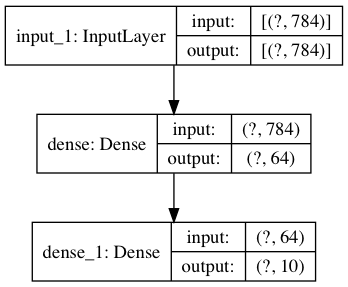

In [4]:
# this will produce a digram of the model -- requires pydot and graphviz installed (pip install pydot graphviz)
# may need to update graphviz package first (Mac: brew install graphviz/Linux: sudo apt-get install graphviz)
keras.utils.plot_model(model, to_file='model_1.png', show_shapes=True, show_layer_names=True)

In [5]:
############################################################
# Model compilation
# Must be called before starting training
############################################################
# For a multi-class classification problem
model.compile(optimizer='sgd',
              loss='categorical_crossentropy', # categorical_crossentropy expects label to be one-hot vector
              metrics=['accuracy'])            # while sparse_categorical_crossentropy handles true labels as integers




In [6]:
# Callback object
mcp = keras.callbacks.ModelCheckpoint(filepath="models/best_model_1.hdf5", verbose=2 , save_best_only=True)
# Fitting the model with training data
results = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_split=0.2, callbacks=[mcp])
# You can also save the last model
model.save("models/end_model_1.hdf5")

Train on 5600 samples, validate on 1400 samples
Epoch 1/50
4992/5600 [=========================>....] - ETA: 0s - loss: 1.8439 - accuracy: 0.4836
Epoch 00001: val_loss improved from inf to 1.28058, saving model to models/best_model_1.hdf5
5600/5600 [==============================] - 1s 105us/sample - loss: 1.7873 - accuracy: 0.5102 - val_loss: 1.2806 - val_accuracy: 0.7436
Epoch 2/50
4960/5600 [=========================>....] - ETA: 0s - loss: 1.0260 - accuracy: 0.7954
Epoch 00002: val_loss improved from 1.28058 to 0.80741, saving model to models/best_model_1.hdf5
5600/5600 [==============================] - 0s 52us/sample - loss: 1.0018 - accuracy: 0.8009 - val_loss: 0.8074 - val_accuracy: 0.8150
Epoch 3/50
5056/5600 [==========================>...] - ETA: 0s - loss: 0.7072 - accuracy: 0.8432
Epoch 00003: val_loss improved from 0.80741 to 0.63281, saving model to models/best_model_1.hdf5
5600/5600 [==============================] - 0s 51us/sample - loss: 0.6977 - accuracy: 0.8452 - va

Epoch 26/50
5216/5600 [==========================>...] - ETA: 0s - loss: 0.2266 - accuracy: 0.9387
Epoch 00026: val_loss improved from 0.30961 to 0.30851, saving model to models/best_model_1.hdf5
5600/5600 [==============================] - 0s 50us/sample - loss: 0.2254 - accuracy: 0.9395 - val_loss: 0.3085 - val_accuracy: 0.9107
Epoch 27/50
4928/5600 [=========================>....] - ETA: 0s - loss: 0.2237 - accuracy: 0.9412
Epoch 00027: val_loss did not improve from 0.30851
5600/5600 [==============================] - 0s 51us/sample - loss: 0.2207 - accuracy: 0.9413 - val_loss: 0.3102 - val_accuracy: 0.9136
Epoch 28/50
4960/5600 [=========================>....] - ETA: 0s - loss: 0.2206 - accuracy: 0.9393
Epoch 00028: val_loss improved from 0.30851 to 0.30537, saving model to models/best_model_1.hdf5
5600/5600 [==============================] - 0s 52us/sample - loss: 0.2173 - accuracy: 0.9413 - val_loss: 0.3054 - val_accuracy: 0.9157
Epoch 29/50
4992/5600 [=========================>.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


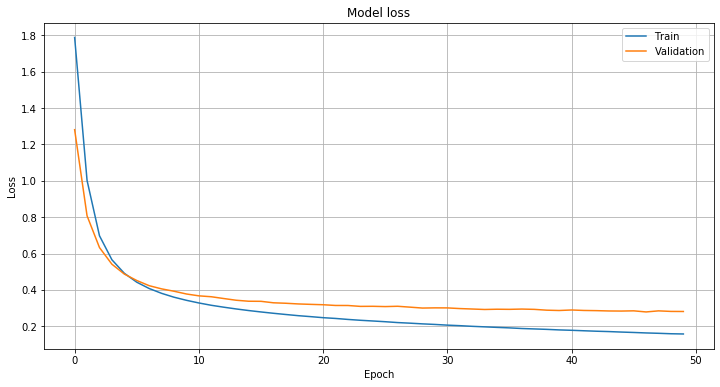

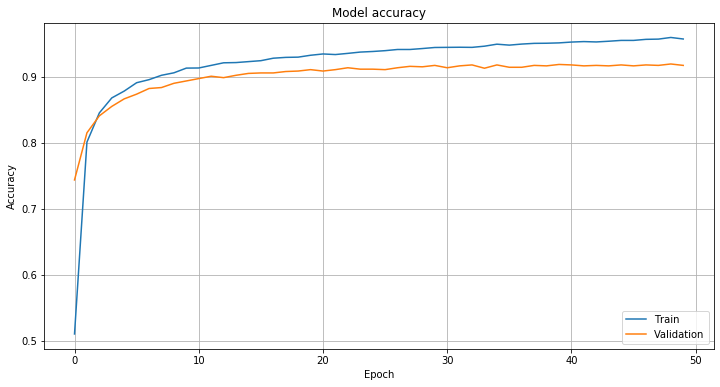

In [7]:
# Visualizing the training history
print(results.history.keys())

# Plot training & validation loss values
plt.figure(figsize=(12,6))
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model loss')
plt.grid()
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.figure(figsize=(12,6))
# Plot training & validation accuracy values
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model accuracy')
plt.grid()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
